In [1]:
from analysis import analysis_functions
import nibabel as nib
import numpy as np
import os
from skimage.morphology import skeletonize
from scipy.ndimage import convolve

/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_51864/2970306978.py:1: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.ndarray.
  from analysis import analysis_functions


In [2]:
path = "/Users/asagilmore/src/temp/xlstm_inferance/IXI-costa/true_labels_costa"

files = os.listdir(path)

print(files[0])

img = nib.load(os.path.join(path, files[0]))

binary_map = img.get_fdata()

skeleton = skeletonize(binary_map)

IXI477.nii.gz


In [3]:
# edge_array = analysis_functions._get_edge_array(binary_map)

# nib.save(nib.Nifti1Image(edge_array.astype(float), img.affine), "edge_array.nii.gz")



In [4]:
distance_map = analysis_functions.get_distance_map(binary_map, 50)


8767 skeleton points


(1024, 1024, 92)
Number of nonzero items: 8767
Number of zero items: 96460225
Number of nonzero items: 8767
Number of zero items: 96460225
Mean distance: 2.120242118835449
Max distance: 10.797959327697754
Min distance: 1.0


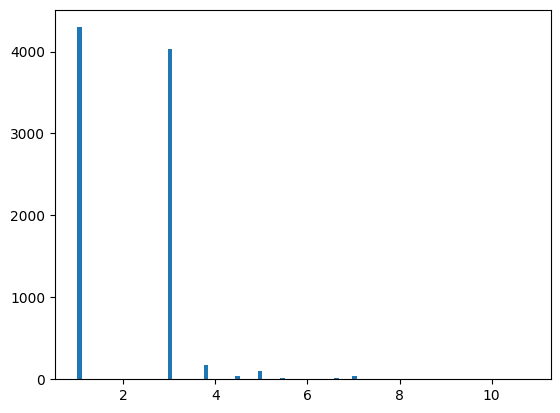

In [5]:
import matplotlib.pyplot as plt
print(distance_map.shape)


def print_zero_nonzero(array):
    non_zero_count = np.count_nonzero(array)
    total_count = array.size
    zero_count = total_count - non_zero_count

    print(f"Number of nonzero items: {non_zero_count}")
    print(f"Number of zero items: {zero_count}")

def get_nonzero_items(array):
    return array[np.nonzero(array)]

print_zero_nonzero(distance_map)
print_zero_nonzero(skeleton)

distances = get_nonzero_items(distance_map)

print(f"Mean distance: {np.mean(distances)}")
print(f"Max distance: {np.max(distances)}")
print(f"Min distance: {np.min(distances)}")

plt.hist(distances, bins=100)
plt.show()
